In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
from sklearn.cross_decomposition import CCA
import math
from sklearn.metrics import r2_score


In [2]:
dataset = pd.read_csv('/content/friction_01.csv')

In [3]:

dataset.head()

,Gradation,d,Sf,DEPTH,width,n,SPEC.,uavg,g,lambda
0,1.31,0.000170,0.000100,2.1153,146.603,7.390000e-07,2.65,0.391274,9.81,0.108397
1,1.50,0.000195,0.000045,1.4630,124.968,9.660000e-07,2.65,0.376983,9.81,0.036424
2,1.59,0.000128,0.000142,0.9144,86.258,8.900000e-07,2.65,0.348601,9.81,0.083707
3,1.44,0.000241,0.000086,1.8593,125.578,9.330000e-07,2.65,0.471650,9.81,0.056523
4,1.00,0.000020,0.000088,2.3805,16.026,5.940000e-07,2.65,0.509830,9.81,0.063012


In [4]:
X0=dataset[['Gradation']]
y0=dataset.iloc[:,-1]
X1=dataset[['Gradation','d']]
y1=dataset.iloc[:,-1]
X2=dataset[['Gradation','d','Sf']]
y2=dataset.iloc[:,-1]
X3=dataset[['Gradation','d','Sf','DEPTH']]
y3=dataset.iloc[:,-1]
X4=dataset[['Gradation','d','Sf','DEPTH','width']]
y4=dataset.iloc[:,-1]
X5=dataset[['Gradation','d','Sf','DEPTH','width','n']]
y5=dataset.iloc[:,-1]
X6=dataset[['Gradation','d','Sf','DEPTH','width','n','SPEC.']]
y6=dataset.iloc[:,-1]
X7=dataset[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg']]
y7=dataset.iloc[:,-1]
X8=dataset[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg','g']]
y8=dataset.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size = 0.2, random_state = 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state = 1)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.2, random_state = 1)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size = 0.2, random_state = 1)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size = 0.2, random_state = 1)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size = 0.2, random_state = 1)


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X0_train[['Gradation']] = sc.fit_transform(X0_train[['Gradation']])
X0_test[['Gradation']] = sc.transform(X0_test[['Gradation']])
X1_train[['Gradation','d']] = sc.fit_transform(X1_train[['Gradation','d']])
X1_test[['Gradation','d']] = sc.transform(X1_test[['Gradation','d']])
X2_train[['Gradation','d','Sf']] = sc.fit_transform(X2_train[['Gradation','d','Sf']])
X2_test[['Gradation','d','Sf']] = sc.transform(X2_test[['Gradation','d','Sf']])
X3_train[['Gradation','d','Sf','DEPTH']] = sc.fit_transform(X3_train[['Gradation','d','Sf','DEPTH']])
X3_test[['Gradation','d','Sf','DEPTH']] = sc.transform(X3_test[['Gradation','d','Sf','DEPTH']])
X4_train[['Gradation','d','Sf','DEPTH','width']] = sc.fit_transform(X4_train[['Gradation','d','Sf','DEPTH','width']])
X4_test[['Gradation','d','Sf','DEPTH','width']] = sc.transform(X4_test[['Gradation','d','Sf','DEPTH','width']])
X5_train[['Gradation','d','Sf','DEPTH','width','n']] = sc.fit_transform(X5_train[['Gradation','d','Sf','DEPTH','width','n']])
X5_test[['Gradation','d','Sf','DEPTH','width','n']] = sc.transform(X5_test[['Gradation','d','Sf','DEPTH','width','n']])
X6_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.']] = sc.fit_transform(X6_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.']])
X6_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.']] = sc.transform(X6_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.']])
X7_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg']] = sc.fit_transform(X7_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg']])
X7_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg']] = sc.transform(X7_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg']])
X8_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg','g']] = sc.fit_transform(X8_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg','g']])
X8_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg','g']] = sc.transform(X8_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg','g']])

In [7]:
from sklearn.linear_model import LinearRegression
reg_linear_0 = LinearRegression()
reg_linear_1 = LinearRegression()
reg_linear_2 = LinearRegression()
reg_linear_3 = LinearRegression()
reg_linear_4 = LinearRegression()
reg_linear_5 = LinearRegression()
reg_linear_6 = LinearRegression()
reg_linear_7 = LinearRegression()
reg_linear_8 = LinearRegression()
reg_linear_0.fit(X0_train, y0_train)
reg_linear_1.fit(X1_train, y1_train)
reg_linear_2.fit(X2_train, y2_train)
reg_linear_3.fit(X3_train, y3_train)
reg_linear_4.fit(X4_train, y4_train)
reg_linear_5.fit(X5_train, y5_train)
reg_linear_6.fit(X6_train, y6_train)
reg_linear_7.fit(X7_train, y7_train)
reg_linear_8.fit(X8_train, y8_train)

LinearRegression()

In [8]:
y0_pred_linear = reg_linear_0.predict(X0_test)
y1_pred_linear = reg_linear_1.predict(X1_test)
y2_pred_linear = reg_linear_2.predict(X2_test)
y3_pred_linear = reg_linear_3.predict(X3_test)
y4_pred_linear = reg_linear_4.predict(X4_test)
y5_pred_linear = reg_linear_5.predict(X5_test)
y6_pred_linear = reg_linear_6.predict(X6_test)
y7_pred_linear = reg_linear_7.predict(X7_test)
y8_pred_linear = reg_linear_8.predict(X8_test)

In [9]:
print(type(y0_test.to_numpy()))

<class 'numpy.ndarray'>


In [10]:
result_linear=(np.concatenate((y0_test.to_numpy().reshape(len(y0_test),1), y0_pred_linear.reshape(len(y0_pred_linear),1), y1_pred_linear.reshape(len(y1_pred_linear),1), y2_pred_linear.reshape(len(y2_pred_linear),1), y3_pred_linear.reshape(len(y3_pred_linear),1), y4_pred_linear.reshape(len(y4_pred_linear),1), y5_pred_linear.reshape(len(y5_pred_linear),1), y6_pred_linear.reshape(len(y6_pred_linear),1), y7_pred_linear.reshape(len(y7_pred_linear),1), y8_pred_linear.reshape(len(y8_pred_linear),1)),1))

In [11]:
print(result_linear)

[[0.04698016 0.0550635  0.04693795 ... 0.05174543 0.05617811 0.05617811]
 [0.13672816 0.04803941 0.05099847 ... 0.06202287 0.06017816 0.06017816]
 [0.0388312  0.14754733 0.12808399 ... 0.12840027 0.12036381 0.12036381]
 ...
 [0.04870679 0.07906247 0.06610871 ... 0.04847621 0.04781891 0.04781891]
 [0.10107212 0.04803941 0.04361156 ... 0.04241468 0.04420835 0.04420835]
 [0.02656417 0.04803941 0.03890486 ... 0.03242476 0.03295417 0.03295417]]


In [12]:
r2_score(y0_test, y0_pred_linear)

0.19198343963611764

In [13]:
r2_score(y1_test, y1_pred_linear)

0.3391254361142323

In [14]:
r2_score(y2_test, y2_pred_linear)

0.34399909993541933

In [15]:
r2_score(y3_test, y3_pred_linear)

0.34758204269216175

In [16]:
r2_score(y4_test, y4_pred_linear)

0.3512993686129311

In [17]:
r2_score(y5_test, y5_pred_linear)

0.3600429631012926

In [18]:
r2_score(y6_test, y6_pred_linear)

0.37562017332223885

In [19]:
r2_score(y7_test, y7_pred_linear)

0.4063225902530704

In [20]:
r2_score(y8_test, y8_pred_linear)

0.40632259025307016

In [21]:
pd.DataFrame(result_linear).to_csv("linear_result.csv")

In [22]:
print('MAE:', metrics.mean_absolute_error(y8_test, y8_pred_linear))
print('MSE:', metrics.mean_squared_error(y8_test, y8_pred_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y8_test, y8_pred_linear)))
print('nse:', (1-(np.sum(((y8_pred_linear)-(y8_test))**2)/np.sum(((y8_test)-(np.mean(y8_test)))**2))))

MAE: 0.027580254303642887
MSE: 0.001714065878596547
RMSE: 0.04140127870726395
nse: 0.40632259025307027


In [23]:
dataset.corr()

,Gradation,d,Sf,DEPTH,width,n,SPEC.,uavg,g,lambda
Gradation,1.000000,0.276934,0.215450,-0.043317,0.060886,-0.107430,0.148696,0.011958,NaN,0.517092
d,0.276934,1.000000,0.467958,-0.285768,-0.271841,-0.322355,-0.059195,0.284322,NaN,0.508604
Sf,0.215450,0.467958,1.000000,-0.423622,-0.363507,-0.330730,-0.030515,0.554583,NaN,0.340537
DEPTH,-0.043317,-0.285768,-0.423622,1.000000,0.857580,0.241416,0.048996,0.112991,NaN,-0.242919
width,0.060886,-0.271841,-0.363507,0.857580,1.000000,0.226678,0.034418,0.076977,NaN,-0.235243
n,-0.107430,-0.322355,-0.330730,0.241416,0.226678,1.000000,0.074944,-0.004142,NaN,-0.116939
SPEC.,0.148696,-0.059195,-0.030515,0.048996,0.034418,0.074944,1.000000,0.143236,NaN,-0.056557
uavg,0.011958,0.284322,0.554583,0.112991,0.076977,-0.004142,0.143236,1.000000,NaN,-0.000647
g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lambda,0.517092,0.508604,0.340537,-0.242919,-0.235243,-0.116939,-0.056557,-0.000647,NaN,1.000000


In [24]:
X1=np.arange(0,len(y8_test))

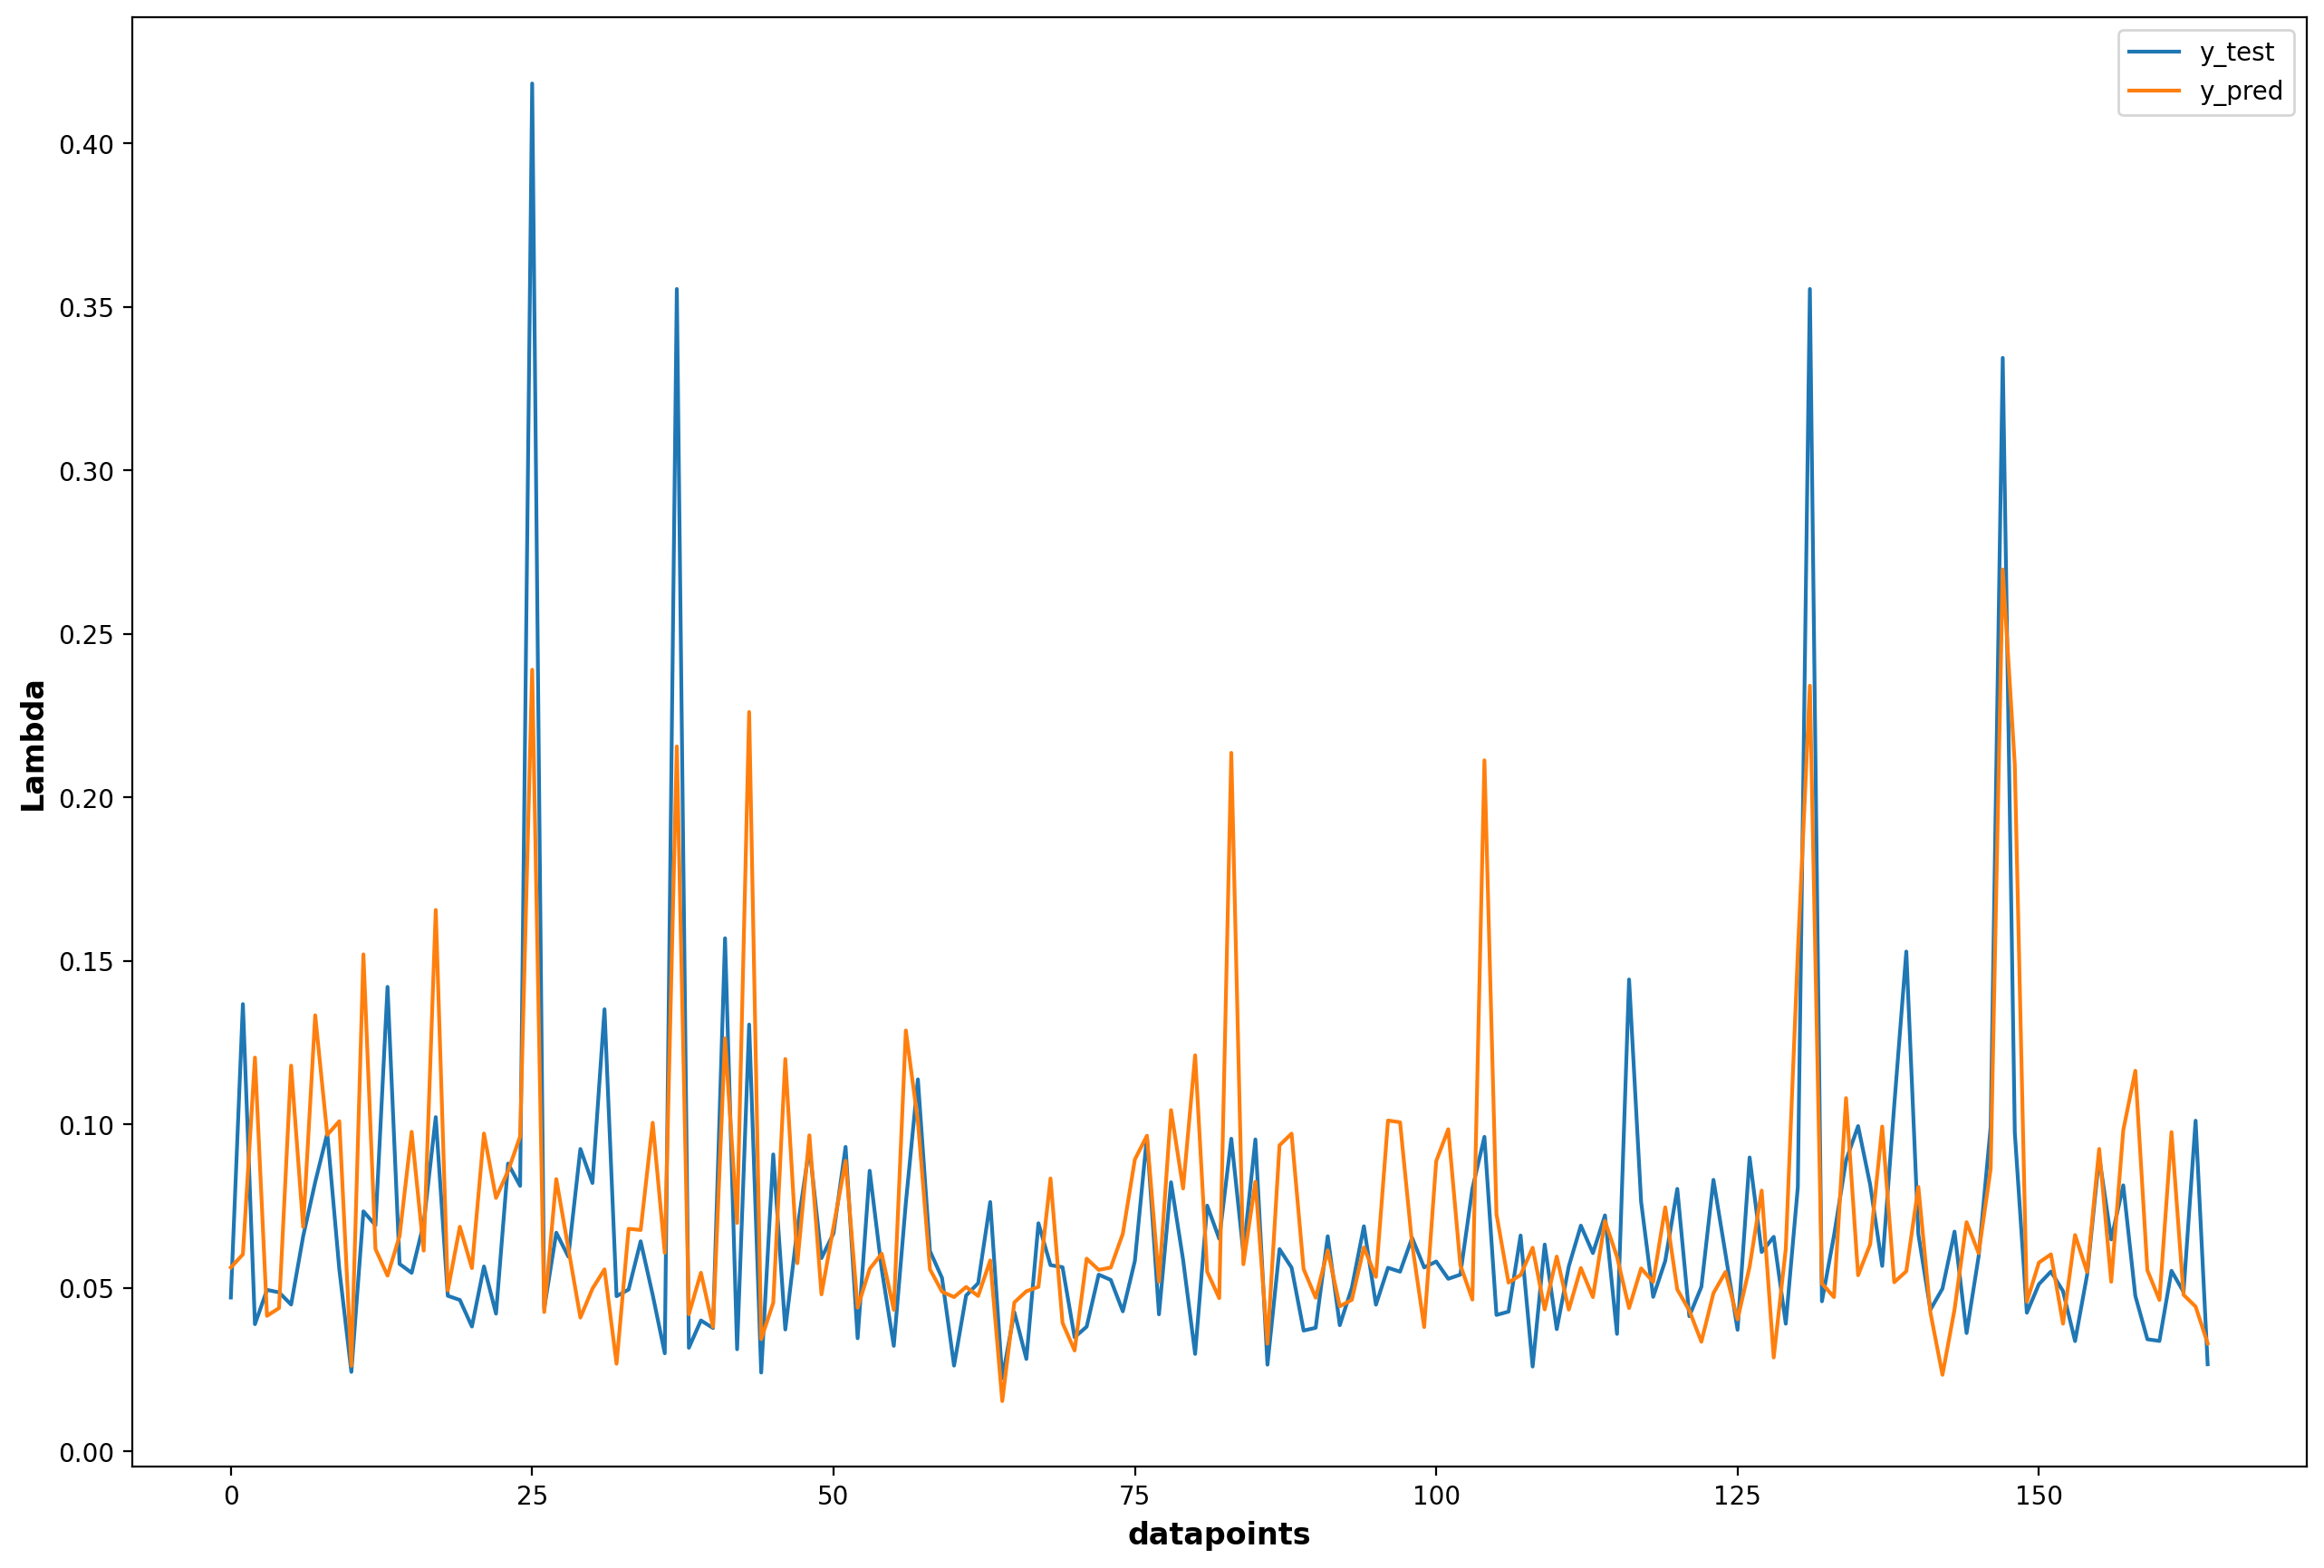

In [25]:
fig = plt.figure(figsize=(12,8), dpi=200)
axes = fig.add_axes([0,0,1,1])
axes.plot(X1, y8_test, label='y_test')
axes.plot(X1, y8_pred_linear, label='y_pred')
plt.ylabel('Lambda',fontweight='bold', fontsize='12')
plt.xlabel('datapoints',fontweight='bold', fontsize='12')
plt.legend()
plt.show()